# **Tast 1: Import packages and Load data**

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
df = pd.read_csv('annualSales2019.csv')
df

Order ID                     Product Quantity Ordered Price Each  \
0        162009                      iPhone                1        700   
1        162009    Lightning Charging Cable                1      14.95   
2        162009            Wired Headphones                2      11.99   
3        162010  Bose SoundSport Headphones                1      99.99   
4        162011      34in Ultrawide Monitor                1     379.99   
...         ...                         ...              ...        ...   
186845   248146  Bose SoundSport Headphones                1      99.99   
186846   248147      AAA Batteries (4-pack)                3       2.99   
186847   248148       AA Batteries (4-pack)                1       3.84   
186848   248149        USB-C Charging Cable                1      11.95   
186849   248150       AA Batteries (4-pack)                1       3.84   

            Order Date                         Purchase Address  
0       03/28/19 20:59          942 Church St, Austin, TX 73301  
1       03/28/19 20:59          942 Church St, Austin, TX 73301  
2       03/28/19 20:59          942 Church St, Austin, TX 73301  
3       03/17/19 05:39     261 10th St, San Francisco, CA 94016  
4       03/10/19 00:01     764 13th St, San Francisco, CA 94016  
...                ...                                      ...  
186845  08/29/19 22:19  868 Hickory St, San Francisco, CA 94016  
186846  08/31/19 16:26        206 Lakeview St, Boston, MA 02215  
186847  08/02/19 07:25           568 13th St, Seattle, WA 98101  
186848  08/08/19 12:10   495 Walnut St, San Francisco, CA 94016  
186849  08/16/19 08:13       738 Park St, Los Angeles, CA 90001  

[186850 rows x 6 columns]

# **Task2: Clean and Preprocess data**

**Task 2.1: Merge 12-month data**

In [24]:

path = '/Users/duha/sales-report-da/data/'
frames = []
all_length = []
for file in os.listdir(path):
	# kiểm tra trong file chỉ lấy dữ liệu có đuôi CSV
	if file.endswith('.csv'):
		filepath =  path + file
		df1 = pd.read_csv(filepath)
		frames.append(df1)
		result = pd.concat(frames)
		# Kiểm tra độ dài của data sau khi merge có bằng với 12 data trước khi merge không ?
		length_oneMonth = len(df1.index)
		all_length.append(length_oneMonth)

result.to_csv('annualSales2019.csv', index=False)
result



Order ID                     Product Quantity Ordered Price Each  \
0       162009                      iPhone                1        700   
1       162009    Lightning Charging Cable                1      14.95   
2       162009            Wired Headphones                2      11.99   
3       162010  Bose SoundSport Headphones                1      99.99   
4       162011      34in Ultrawide Monitor                1     379.99   
...        ...                         ...              ...        ...   
12006   248146  Bose SoundSport Headphones                1      99.99   
12007   248147      AAA Batteries (4-pack)                3       2.99   
12008   248148       AA Batteries (4-pack)                1       3.84   
12009   248149        USB-C Charging Cable                1      11.95   
12010   248150       AA Batteries (4-pack)                1       3.84   

           Order Date                         Purchase Address  
0      03/28/19 20:59          942 Church St, Austin, TX 73301  
1      03/28/19 20:59          942 Church St, Austin, TX 73301  
2      03/28/19 20:59          942 Church St, Austin, TX 73301  
3      03/17/19 05:39     261 10th St, San Francisco, CA 94016  
4      03/10/19 00:01     764 13th St, San Francisco, CA 94016  
...               ...                                      ...  
12006  08/29/19 22:19  868 Hickory St, San Francisco, CA 94016  
12007  08/31/19 16:26        206 Lakeview St, Boston, MA 02215  
12008  08/02/19 07:25           568 13th St, Seattle, WA 98101  
12009  08/08/19 12:10   495 Walnut St, San Francisco, CA 94016  
12010  08/16/19 08:13       738 Park St, Los Angeles, CA 90001  

[186850 rows x 6 columns]

**Task 2.2: Add 'Month' column**

In [31]:
# Cắt tháng trong chuỗi Order Date
df['Month'] = df['Order Date'].str[0:2]
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   162009                      iPhone                1        700   
1   162009    Lightning Charging Cable                1      14.95   
2   162009            Wired Headphones                2      11.99   
3   162010  Bose SoundSport Headphones                1      99.99   
4   162011      34in Ultrawide Monitor                1     379.99   

       Order Date                      Purchase Address Month  
0  03/28/19 20:59       942 Church St, Austin, TX 73301    03  
1  03/28/19 20:59       942 Church St, Austin, TX 73301    03  
2  03/28/19 20:59       942 Church St, Austin, TX 73301    03  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016    03  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016    03

**Task 2.3: Get rid of 'NaN' and 'Or' value**

In [34]:
print(set(df['Month']))

{'05', '10', '01', '04', '09', '07', '11', '06', '08', '03', '02', '12'}


In [33]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   162009                      iPhone                1        700   
1   162009    Lightning Charging Cable                1      14.95   
2   162009            Wired Headphones                2      11.99   
3   162010  Bose SoundSport Headphones                1      99.99   
4   162011      34in Ultrawide Monitor                1     379.99   

       Order Date                      Purchase Address Month  
0  03/28/19 20:59       942 Church St, Austin, TX 73301    03  
1  03/28/19 20:59       942 Church St, Austin, TX 73301    03  
2  03/28/19 20:59       942 Church St, Austin, TX 73301    03  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016    03  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016    03

# **Task3: Reporting**

**Task 3.1: What was the best month for sales? How much was earned that month?**

In [39]:
# Kiểm tra kiểu dữ liệu của Quantity Ordered & Price Each
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [47]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4,'Sales',moving_column)
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height= sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

In [44]:
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']

**Task 3.2: What city has the best sale?**

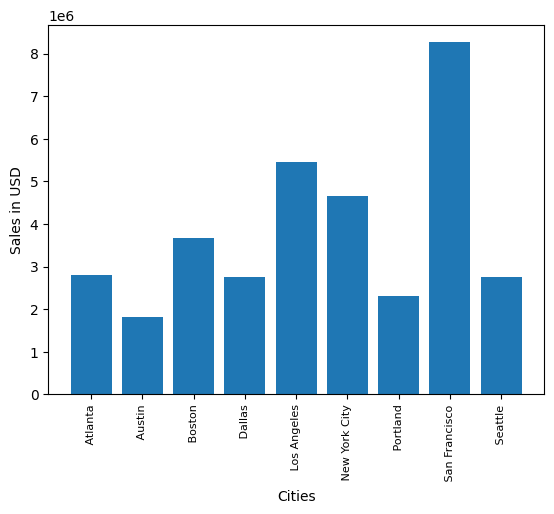

In [59]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.groupby('City').sum()['Sales']
sales_value_city = df.groupby('City').sum()['Sales']
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

**Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?**

In [63]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()


**Task 3.4: What products are most often sold together?**

In [72]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

/var/folders/mx/__zp2dyx02g_k1_g_3n5xcrc0000gn/T/ipykernel_3827/427715042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

**Task 3.5: What product sold the most? Why do you think it sold the most?**

/var/folders/mx/__zp2dyx02g_k1_g_3n5xcrc0000gn/T/ipykernel_3827/2314957562.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls,rotation=90, size=8)


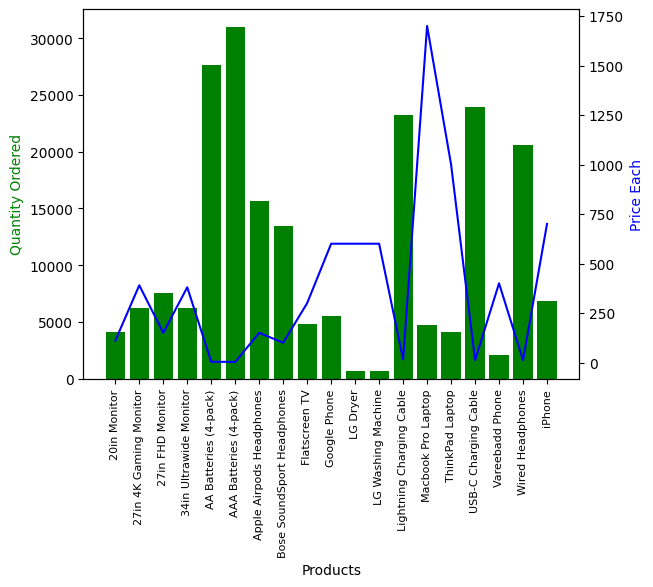

In [75]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

# Thêm trục y lên biểu đồ
x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x,y1,color='g')
ax2.plot(x,y2,'b-')

ax1.set_xticklabels(products_ls,rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()


Từ đồ thị tương quan có thể thấy rằng với sản phẩm giá rẻ thì bán được nhiều hơn, còn sản phẩm mắc tiền thì bán không được nhiều
Sản phẩm bán chạy: AA Batteries (4-pack), AAA Batteries (4-pack)